In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(42)
X, y = make_blobs(n_samples=700, centers=3, cluster_std=0.6, random_state=0)

In [ ]:
class KMeansScratch:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def initialize_centroids(self, X):
        #Random centroids.
        n_samples = X.shape[0]
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        return X[random_indices]

    def assign_clusters(self, X, centroids):
        #Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        return np.argmin(distances, axis=1)

    def compute_centroids(self, X, labels):
        #Recompute centroids
        centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return centroids

    def compute_inertia(self, X, centroids, labels):
        #sum of squared distances(inertia)
        distances = np.linalg.norm(X - centroids[labels], axis=1)
        return np.sum(distances ** 2)

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for _ in range(self.max_iters):
            self.labels = self.assign_clusters(X, self.centroids)
            new_centroids = self.compute_centroids(X, self.labels)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        self.inertia_ = self.compute_inertia(X, self.centroids, self.labels)
        return self

<ipython-input-27-18fe1f1e8293>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)


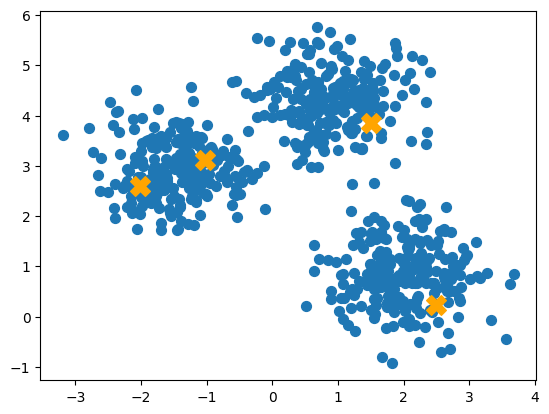

In [ ]:
def plot_clusters(X, centroids=None, labels=None):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='orange', marker='X')
    plt.show()

kmeans = KMeansScratch(n_clusters=4)
initial_centroids = kmeans.initialize_centroids(X)
plot_clusters(X, centroids=initial_centroids)

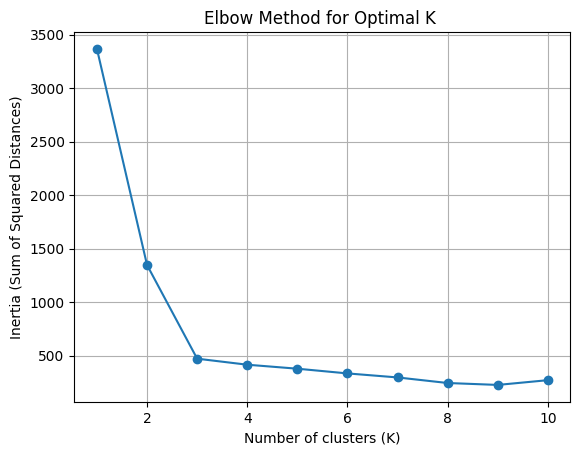

The optimal value of K is: 2


In [ ]:
def calculate_inertia_and_optimal_k(X, max_k):
    inertia_values = []
    for k in range(1, max_k+1):
        kmeans = KMeansScratch(n_clusters=k)
        kmeans.fit(X)
        inertia_values.append(kmeans.inertia_)
    optimal_k = 1
    for i in range(1, max_k-1):
        if (inertia_values[i-1] - inertia_values[i]) > (inertia_values[i] - inertia_values[i+1]):
            optimal_k = i + 1
            break

    return inertia_values, optimal_k

inertia_values, optimal_k = calculate_inertia_and_optimal_k(X, 10)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title(f'Elbow Method for Optimal K ')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

print(f"The optimal value of K is: {optimal_k}")